In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)


df['job_skills'] = df['job_skills'].apply(clean_li)

In [3]:

df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [38]:
df
df_da = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country']== 'India')] #& (df[df['job_location'] == 'India')].copy()
df_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']}
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']}
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']}
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['..."


Text(0, 0.5, 'No of jobs')

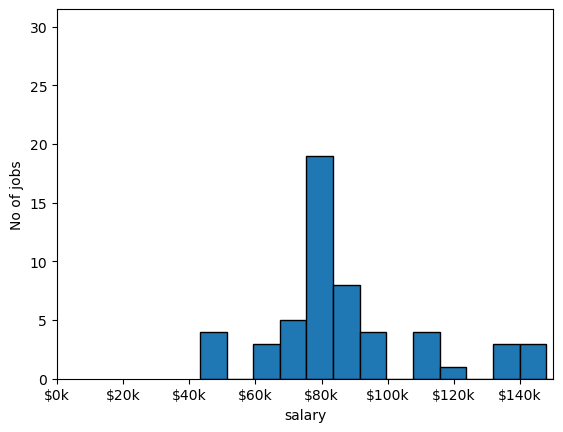

In [39]:
df_da['salary_year_avg'].plot(kind='hist',bins=20,edgecolor='black')
plt.xlim(0,150000)
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}k'))
plt.xlabel('salary')
plt.ylabel('No of jobs')